# Using the dcnorm module

* This notebook teaches some of the basic functionality of the `dcnorm` module.

* The `NCGR` package (https://adirkson.github.io/sea-ice-timing/) should be installed before running this notebook.

As a first step, we'll import the modules used in this notebook.

In [1]:
#from NCGR.dcnorm import dcnorm_gen
from dcnorm import dcnorm_gen
import numpy as np
import matplotlib.pyplot as plt

First define variables for the **minimum** ($a$) and **maximum** ($b$) values that the DCNORM distribution takes.

In [2]:
a=120 # minimum
b=273 # maximum

Now instantiate the `dcnorm_gen` class:

In [3]:
dcnorm = dcnorm_gen(a=a, b=b)

We can now make a DCNORM distribution object with the fixed `a` and `b` values, and some arbitrary parameter values $\mu$ and $\sigma$:

In [4]:
# mu variable for the DCNORM distribution
m=132.
# sigma variable for the DCNORM distribution
s=20.
# freeze a dcnorm distribution object
rv = dcnorm(m,s)

`rv` is now a frozen object representing a random variable described by the DCNORM distribution with the given parameters (try some others, too!); it has several methods (see documentation for `dcnorm_gen`. We'll go through some main ones now.

For instance, its PDF can be calculated and plotted simply with:

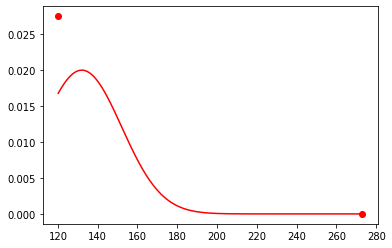

In [5]:
x = np.linspace(a, b, 1000) # discretize the range from a to b
x_sub = x[(x!=a)&(x!=b)] # extract from those values where x is not a or b
plt.figure()
plt.plot(x_sub, rv.pdf(x_sub), color='r') # plot for a<x<b
plt.plot(a, rv.pdf(a)*1e-1, 'o', color='r') # point mass at a (re-scale by 1/10 for plotting)
plt.plot(b, rv.pdf(b)*1e-1, 'o', color='r') # point mass at b (re-scale by 1/10 for plotting)
plt.show()

Note that the maginute of the circles have been reduced by a factor of 1e-1 to make it easier to see the shape of the PDF. It's not actually necessary to plot the different components of the PDF seperately; the reason for doing so was purely cosmetic. We could have also typed 
```python 
plt.figure()
plt.plot(x,rv.pdf(x), color='r')
plt.show()
```

A random sample can be drawn from the distribution with:

In [6]:
X = rv.rvs(size=20)

We'll now plot the this sample that was generated, along with the true PDF:

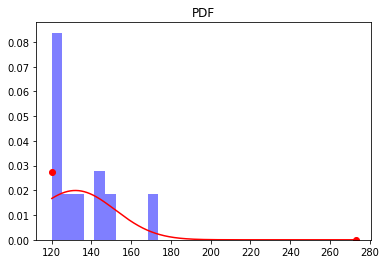

In [7]:
plt.figure()
plt.hist(X, density=True, color='b', alpha=0.5)
plt.plot(x_sub, rv.pdf(x_sub), color='r') # plot for a<x<b
plt.plot(a, rv.pdf(a)*1e-1, 'o', color='r') # point mass at a (re-scale by 1/10 for plotting)
plt.plot(b, rv.pdf(b)*1e-1, 'o', color='r') # point mass at b (re-scale by 1/10 for plotting)
plt.title('PDF')
plt.show()

Next, we'll use the `dcnorm.fit` function to fit the sample of data to a DCNORM distribution using Maximum Likelihood estimation:

In [8]:
m_fit, s_fit = dcnorm.fit(X) # fit parameters to data
rv_fit = dcnorm(m_fit, s_fit) # create new distribution object with fitted parameters

and recreate the previous plot, but also include the fitted distribution:

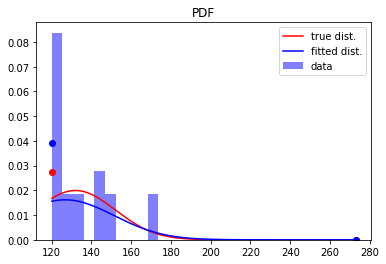

In [9]:
plt.figure()
plt.hist(X, density=True, color='b', alpha=0.5, label='data')
plt.plot(x_sub, rv.pdf(x_sub), color='r', label='true dist.') # plot for a<x<b
plt.plot(a, rv.pdf(a)*1e-1, 'o', color='r') # point mass at a (re-scale by 1/10 for plotting)
plt.plot(b, rv.pdf(b)*1e-1, 'o', color='r') # point mass at b (re-scale by 1/10 for plotting)

plt.plot(x_sub, rv_fit.pdf(x_sub), color='b', label='fitted dist.') # plot for a<x<b
plt.plot(a, rv_fit.pdf(a)*1e-1, 'o', color='b') # point mass at a (re-scale by 1/10 for plotting)
plt.plot(b, rv_fit.pdf(b)*1e-1, 'o', color='b') # point mass at b (re-scale by 1/10 for plotting)

plt.legend()
plt.title('PDF')
plt.show()

We can make an analogous plot for the CDF's as well, making used of the `dcnorm.ecdf` function to plot the empirical CDF for the data:

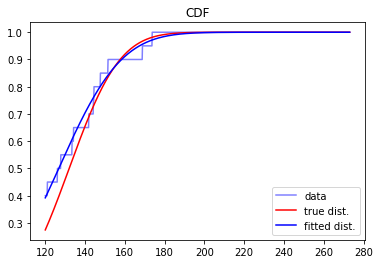

In [10]:
plt.figure()
plt.plot(x, dcnorm.ecdf(x,X), color='b', alpha=0.5, label='data')
plt.plot(x, rv.cdf(x), color='r', label='true dist.') # plot for a<x<b
plt.plot(x, rv_fit.cdf(x), color='b', label='fitted dist.') # plot for a<x<b
plt.legend()
plt.title('CDF')
plt.show()

Finally, we'll compute the statistical moments of the distribution (mean, variance, skewness, kurtosis), noting that the mean and variance are calculalated with analytic expressions.

In [11]:
m, v, s, k = rv.stats('mvsk')
print("mean, variance, skewness, kurtosis", (m, v, s, k))

mean, variance, skewness, kurtosis (array(135.37345464), array(238.43710092), array(0.9142011), array(0.24932382))
